In [1]:
######################################################################################
# Using Electrodermal Activity to Detect Deception and Suspicion during a Card Game
# Affective Computing - Mini-project
# Jan Ondras
# Dec 2017 - Jan 2018
######################################################################################
##################################################################################
# Generate statistics about players
##################################################################################

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

print 'Subject ID | % lied | % was suspicious\n---------------------------------------------------'

# Iterate over 10 games
for j in range(1, 21, 2):
    GID = '{:02d}'.format(j) + '{:02d}'.format(j+1)
    P1_SID =  GID[0:2]
    P2_SID = GID[2:4]

    # Load annotations
    events_data = np.loadtxt('./../Experiment/AnnotatedEvents/G' + GID + '.csv', delimiter=",", skiprows=1, dtype=str)
    events_data = events_data[:]

    # No need to check annotations, already checked

    P1_lied = P1_truth = P1_susp = 0.
    P2_lied = P2_truth = P2_susp = 0.
    for i, event in enumerate(events_data):
        if event[1] == 'D':
            if event[2] != '':
                if event[2] == event[4]: # truth
                    P1_truth += 1
                else:                    # deception
                    P1_lied += 1

            elif event[3] != '':
                if event[3] == event[4]: # truth
                    P2_truth += 1
                else:                    # deception
                    P2_lied += 1
            else:
                print "Error! ", event

        elif event[1] == 'S':
            if event[2] == 'CH':
                P1_susp += 1
            elif event[3] == 'CH':
                P2_susp += 1
        else:
            #print event[1] # EOG
            pass
    
    print P1_SID, 100.*P1_lied/(P1_lied + P1_truth), 100.*P1_susp/(P2_lied + P2_truth)
    print P2_SID, 100.*P2_lied/(P2_lied + P2_truth), 100.*P2_susp/(P1_lied + P1_truth)

    # Calculate player stats:
#     print "P1: "
#     print "\t lied ", 100.*P1_lied/(P1_lied + P1_truth)," %"
#     print "\t was suspicious ", 100.*P1_susp/(P2_lied + P2_truth)," %"

#     print "P2: "
#     print "\t lied ", 100.*P2_lied/(P2_lied + P2_truth)," %"
#     print "\t was suspicious ", 100.*P2_susp/(P1_lied + P1_truth)," %"


Subject ID | % lied | % was suspicious
---------------------------------------------------
01 34.7826086957 22.2222222222
02 37.037037037 8.69565217391
03 48.3870967742 44.1176470588
04 11.7647058824 9.67741935484
05 28.0701754386 12.5
06 58.9285714286 10.5263157895
07 31.654676259 31.2925170068
08 34.693877551 23.0215827338
09 63.3333333333 11.2903225806
10 62.9032258065 5.0
11 37.9032258065 25.3968253968
12 32.5396825397 25.8064516129
13 49.4505494505 22.3404255319
14 40.4255319149 17.5824175824
15 38.4615384615 16.4179104478
16 29.8507462687 10.7692307692
17 18.8405797101 37.9746835443
18 46.835443038 10.1449275362
19 53.5211267606 10.7692307692
20 69.2307692308 14.0845070423


Openness  x DECEPTION RATE => r =  0.1220571674
Openness  x SUSPICION RATE => r =  -0.176789151341
Conscientiousness  x DECEPTION RATE => r =  -0.438400829543
Conscientiousness  x SUSPICION RATE => r =  0.241219143705
Extraversion  x DECEPTION RATE => r =  0.140400517094
Extraversion  x SUSPICION RATE => r =  0.0137031158169
Agreeableness  x DECEPTION RATE => r =  0.360237750693
Agreeableness  x SUSPICION RATE => r =  -0.0570140254487
Neuroticism  x DECEPTION RATE => r =  0.130402025204
Neuroticism  x SUSPICION RATE => r =  -0.0731241551654


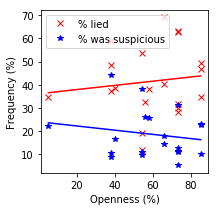

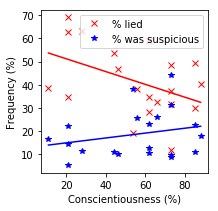

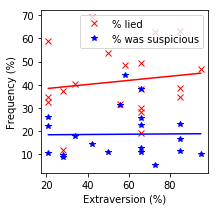

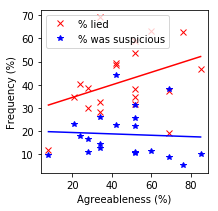

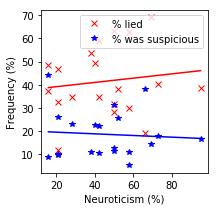

each datapoint corresponds to one study participant


In [8]:
##################################################################################
# Player stats against their personality, clustering ?
##################################################################################

data = np.loadtxt('./../Experiment/gameStats_vs_personality.csv', delimiter=",", skiprows=1, usecols=(1,2,3,4,5,6,7), dtype=np.float32)
header = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
for i in range(5):
    # Calculate Pearson correlation coefficient
    print header[i], " x DECEPTION RATE => r = ", np.corrcoef(data[:,i], data[:,5])[0,1]
    print header[i], " x SUSPICION RATE => r = ", np.corrcoef(data[:,i], data[:,6])[0,1]
    plt.figure(figsize=(3,3))
    plt.plot(data[:,i], data[:,5], 'rx', label='% lied')
    plt.plot(np.unique(data[:,i]), np.poly1d(np.polyfit(data[:,i], data[:,5], 1))(np.unique(data[:,i])), 'r')
    plt.plot(data[:,i], data[:,6], 'b*', label='% was suspicious')
    plt.plot(np.unique(data[:,i]), np.poly1d(np.polyfit(data[:,i], data[:,6], 1))(np.unique(data[:,i])), 'b')
    plt.xlabel(header[i]+' (%)')
    plt.ylabel('Frequency (%)')
    plt.legend()
plt.show()
print "each datapoint corresponds to one study participant"
# Plots 2 and 4 show largest correlations